(426, 640, 3)


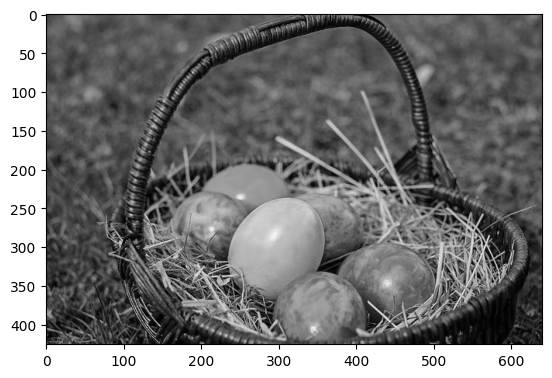

(426, 640)


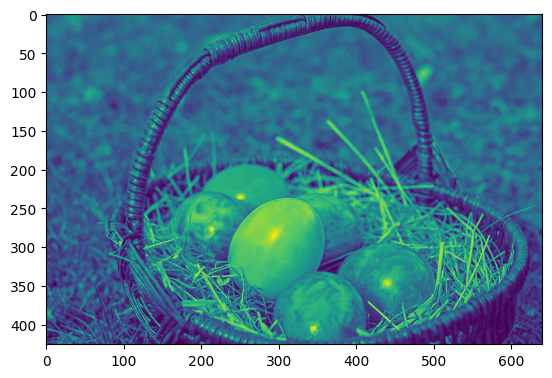

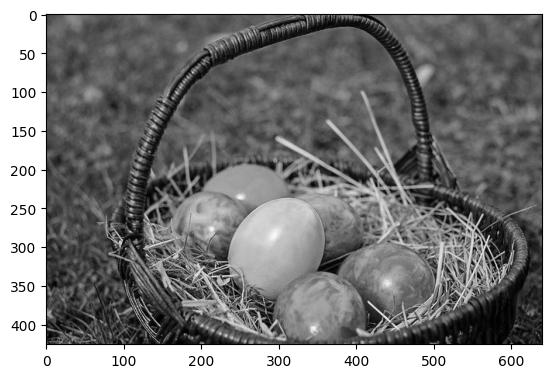

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

color_img = Image.open('fruits.jpg')
# plt.imshow(color_img)
# plt.show()

#이미지 객체 -> numpy 행렬
color_pixel = np.array(color_img)
print(color_pixel.shape)

gray_pixel = color_pixel.copy()

for y in range(gray_pixel.shape[0]):
    for x in range(gray_pixel.shape[1]):
        gray_pixel[y, x] = np.mean(gray_pixel[y, x])

plt.imshow(gray_pixel)
plt.show()

#흑백 이미지를 2차원 표현

gray_2d_pixel = gray_pixel[:, :, 0] # :은 행과 열 다 가져옴 2D로 바뀜
print(gray_2d_pixel.shape)

plt.imshow(gray_2d_pixel)
plt.show() #R값만 보여주고 나머지 다 0으로 들어감 

plt.imshow(gray_2d_pixel, 'gray')
plt.show()

(429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 1)
(1, 427, 638, 1)


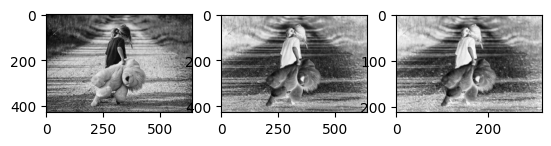

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure() # 큰 도화지
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ori_img = img.imread('images\girl.jpg')

ax1.imshow(ori_img)
print(ori_img.shape)

#convolution -> API
#API -> 4차원 (이미지 개수, 세로, 가로, 채널)
#(429, 640, 3) -> (1, 429, 640, 3) 4차원으로 바꿔주기 위해 1를 추가!
input_image = ori_img.reshape((1,) + ori_img.shape) #reshape은 3개를 4개로 만드는 역할
input_image = input_image.astype(np.float32) # 정수 값 -> tf에서 float 처리하기 위해
print(input_image.shape)

ch1_input_image = input_image[:,:,:,0:1] #차원을 줄이기 위해 슬라이싱 해줌 (데이터 간략화)
print(ch1_input_image.shape)
#(1, 429, 640, 1) 현재 상태

filter = np.array(
    [[[[-1]],[[0]],[[0]]],
    [[[0]],[[-1]],[[0]]],
    [[[0]],[[0]],[[-1]]]]
)

print(filter.shape)

conv2d = tf.nn.conv2d(
    ch1_input_image, 
    filter,
    strides = [1, 1, 1, 1], #이름 넣기 가능
    padding = 'VALID' #패딩을 고려X, 원래 값으로 
)

conv2d_result = conv2d.numpy()
print(conv2d_result.shape)

t_img = conv2d_result[0, :, :, :]
ax2.imshow(t_img, cmap = 'gray')

#pooling 공간 크기를 줄이거나 특정 정보를 강조하는 등의 목적
#Max Pooling은 각 풀링 영역에서 최대값을 추출하는 방식
pool = tf.nn.max_pool(
    conv2d_result,
ksize = [1, 3, 3, 1],
strides = [1, 2, 2, 1],
padding = 'VALID'
)
pool_result = pool.numpy()
t_img = pool_result[0, :, :, :]
ax3.imshow(t_img, cmap = 'gray')

Found 2004 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.]


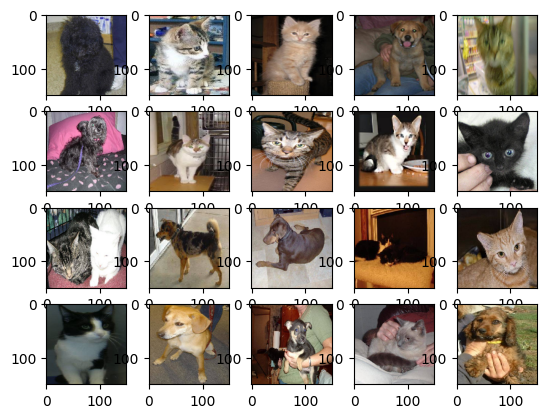

In [4]:
#imageDataGenerator 텐서플로에 내장되어 있는 케라스

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#위치
train_dir = 'cat_dog_small/train' #'리눅스에선 ./cat_dog_small/train'
validation_dir = 'cat_dog_small/validation'

#생성
train_datagen = ImageDataGenerator(rescale = 1/255) #0-1까지 정규화
validation_datagen = ImageDataGenerator(rescale = 1/255)

#설정
train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes = ['cats', 'dogs'], #타겟, 레이블 (순서 중요)
    target_size = (150, 150),
    batch_size = 20, 
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes = ['cats', 'dogs'], #타겟, 레이블 (순서 중요)
    target_size = (150, 150),
    batch_size = 20, 
    class_mode = 'binary'
)

# generator 동작확인

# 한번에 20개이미지 가져와서 

fig=plt.figure()
axs=[]

for i in range(20): 
    axs.append(fig.add_subplot(4, 5, i + 1))

for data_batch, label_batch in train_generator:
    print(data_batch.shape)

    for idx,img_data in enumerate(data_batch):
        axs[idx].imshow(img_data)
    
    print(label_batch.shape)
    print(label_batch)
        
    break  


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential # model, box
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

# 1. model  생성
model=Sequential()

# 2. 모델에 layer추가

###1
model.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=(1,1),
    padding='valid',
    activation='relu',
    input_shape=(150,150,3)   
))

model.add(MaxPooling2D(
    pool_size=(2,2)
))

#####2
model.add(Conv2D(
    filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    padding='valid',
    activation='relu', 
))

model.add(MaxPooling2D(
    pool_size=(2,2)
))
#####3
model.add(Conv2D(
    filters=128,
    kernel_size=(3,3),
    strides=(1,1),
    padding='valid',
    activation='relu', 
))

model.add(MaxPooling2D(
    pool_size=(2,2)
))
#####4
model.add(Conv2D(
    filters=256,
    kernel_size=(3,3),
    strides=(1,1),
    padding='valid',
    activation='relu', 
))

model.add(MaxPooling2D(
    pool_size=(2,2)
))
#####5
model.add(Conv2D(
    filters=512,
    kernel_size=(3,3),
    strides=(1,1),
    padding='valid',
    activation='relu', 
))

model.add(MaxPooling2D(
    pool_size=(2,2)
))


################################# 특성추출
model.add(Flatten())

model.add(Dense(
    units=1,
    activation='sigmoid'
))
model.summary()

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['acc']
)

model.fit(
    train_generator,    #train_generator에서 가져올 batch 개수
    steps_per_epoch=100, #전체 훈련 데이터 셋을 몇 번 반복할지
    epochs=3,
    validation_data=validation_generator,
    validation_steps=50, #(1000/20)
    verbose=1            #중간중간 자기가 뭐 하고 있는지 보여준다
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 17, 17, 128)      

Found 2004 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)
[0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.]


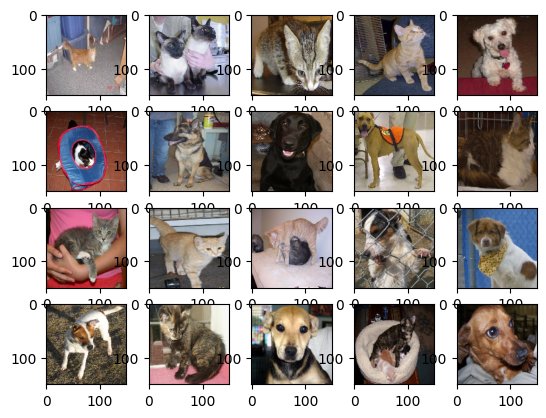

In [8]:
#imageDataGenerator 텐서플로에 내장되어 있는 케라스

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#위치
train_dir = 'cat_dog_small/train' #'리눅스에선 ./cat_dog_small/train'
validation_dir = 'cat_dog_small/validation'

#생성
train_datagen = ImageDataGenerator(rescale = 1/255) #0-1까지 정규화
validation_datagen = ImageDataGenerator(rescale = 1/255)

#설정
train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes = ['cats', 'dogs'], #타겟, 레이블 (순서 중요)
    target_size = (150, 150),
    batch_size = 20, 
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes = ['cats', 'dogs'], #타겟, 레이블 (순서 중요)
    target_size = (150, 150),
    batch_size = 20, 
    class_mode = 'binary'
)

# generator 동작확인

# 한번에 20개이미지 가져와서 

fig=plt.figure()
axs=[]

for i in range(20): 
    axs.append(fig.add_subplot(4, 5, i + 1))

for data_batch, label_batch in train_generator:
    print(data_batch.shape)

    for idx,img_data in enumerate(data_batch):
        axs[idx].imshow(img_data)
    
    print(label_batch.shape)
    print(label_batch)
        
    break  


In [10]:
from tensorflow.keras.applications import VGG16

model_base = VGG16(
    weights = 'imagenet', 
    include_top = False, #필터를 어떤걸 쓸건지 여기서는 filter만 가져옴
    input_shape = (150, 150, 3)
)

model_base.summary()

58889256/58889256 [==============================] - 33s 1us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                             

In [15]:
#VGG16 -> 전이학습
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential #모델 담을 수 있는
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

#1. 모델 생성
model = Sequential()

#2.VGG16으로 대체
model_base = VGG16(
    weights = 'imagenet', 
    include_top = False, #필터를 어떤걸 쓸건지 여기서는 filter만 가져옴
    input_shape = (150, 150, 3)
)

#3. 특성 추출
model_base.trainable = False #이미 완성된 필터만 사용, 변경하지 않을 것이다

model.add(model_base)

model.add(Flatten())

model.add(Dense(
    units = 1,
    activation = 'sigmoid'
))

model.summary()

#모델 설정
model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['acc']
)
#학습
model.fit(
    train_generator,
    steps_per_epoch = 100, #2000 / 20 = 100
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50, #1000 / 20 = 50
    verbose = 1
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 1)                 8193      
                                                                 
Total params: 14722881 (56.16 MB)
Trainable params: 8193 (32.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/30
100/100 [==============================] - 133s 1s/step - loss: 0.3810 - acc: 0.8276 - val_loss: 0.3121 - val_acc: 0.8610
Epoch 2/30
100/100 [==============================] - 130s 1s/step - loss: 0.2374 - acc: 0.9163 - val_loss: 0.2563 - val_acc: 0.9030
Epoch 3/